In [1]:
# Quick work around to import packages in the parent directory
import sys
sys.path.insert(0,'..')

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/us_covid19_daily.csv')
df['deathIncrease'] = df['deathIncrease'].astype(int)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['unixTime'] = df['date'].astype(int) / 10**9
df = df[['unixTime', 'deathIncrease']]

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
covid = pd.DataFrame(foo)

df = pd.read_csv('../data/Bike-Sharing-Dataset/day.csv')
df = df[['temp', 'cnt']]

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
bike = pd.DataFrame(foo)

df = pd.read_csv('../data/pw_data3_1000.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
synthetic_500 = pd.DataFrame(foo)

df = pd.read_csv('../data/pw_data3_5000.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
synthetic_5k = pd.DataFrame(foo)

datasets = [
    {'name' : 'Covid', 'data': covid},
    {'name' : 'Bike', 'data': bike},
    {'name' : 'Synthetic_500', 'data': synthetic_500},
    {'name' : 'Synthetic_5k', 'data': synthetic_5k}
]

In [3]:
plt.rcParams.update({'font.size': 12})

# Max Test

In [ ]:
maxAlphas = ['1e-8', '5e-3']
for alpha in maxAlphas:
    for dataset in datasets:
        df_all = pd.read_csv(f"../data/results/max_comp_{dataset['name']}_alpha{alpha}_all.csv")
        df_best = pd.read_csv(f"../data/results/max_comp_{dataset['name']}_alpha{alpha}_best.csv")
        
        idx = df_all.groupby(['iteration'])['test-rmse'].transform(min) == df_all['test-rmse']
        df_bestPerIter = df_all[idx]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
        ax1.set_title(f"Bootstrap Results: {dataset['name']} Dataset")
        ax1.set_ylabel('RMSE')
        ax1.set_xlabel('Iteration')
        for max_val in df_all['max'].unique():
            ax1.plot(df_all[df_all['max']==max_val]['iteration'], df_all[df_all['max']==max_val]['test-rmse'], '-', alpha=0.7)
        # ax1.legend(df_all['max'].unique())
        ax1.legend(('Max', 'SofterMax'))

        idx = df_all.groupby(['iteration'])['time'].transform(min) == df_all['time']
        df_bestPerIter = df_all[idx]

        ax2.set_title(f"Bootstrap Results: {dataset['name']} Dataset")
        ax2.set_ylabel('Time (s)')
        ax2.set_xlabel('Iteration')
        for max_val in df_all['max'].unique():
            ax2.plot(df_all[df_all['max']==max_val]['iteration'], df_all[df_all['max']==max_val]['time'], '-', alpha=0.7)
        # ax2.legend(df_all['max'].unique())
        ax2.legend(('Max', 'SofterMax'))

        plt.savefig(f"../visualizations/max_comp/max_test_alpha{alpha}_{dataset['name']}", dpi=300)
        plt.show()

        fig, (row1, row2) = plt.subplots(2, 2, figsize=(16, 16))
        ax1 = row1[0]
        ax2 = row1[1]
        ax3 = row2[0]
        ax4 = row2[1]

        ax1.set_title('Average RMSE')
        ax1.set_ylabel('Mean RMSE')
        ax1.bar(['Max', 'SofterMax'], [df_all[df_all['max']==True]['test-rmse'].mean(), df_all[df_all['max']==False]['test-rmse'].mean()])

        ax2.set_title('Average Number of Iterations')
        ax2.set_ylabel('Mean Iterations')
        ax2.bar(['Max', 'SofterMax'], [df_all[df_all['max']==True]['iterations'].mean(), df_all[df_all['max']==False]['iterations'].mean()])

        ax3.set_title('Average Time')
        ax3.set_ylabel('Mean Time (s)')
        ax3.bar(['Max', 'SofterMax'], [df_all[df_all['max']==True]['time'].mean(), df_all[df_all['max']==False]['time'].mean()])

        ax4.set_title('Average Number of Knots')
        ax4.set_ylabel('Mean Number of Knots')
        ax4.bar(['Max', 'SofterMax'], [df_all[df_all['max']==True]['numKnots'].mean(), df_all[df_all['max']==False]['numKnots'].mean()])

        plt.savefig(f"../visualizations/max_comp/max_comp_alpha{alpha}_{dataset['name']}", dpi=300) 
        plt.show()

# Genetic Test

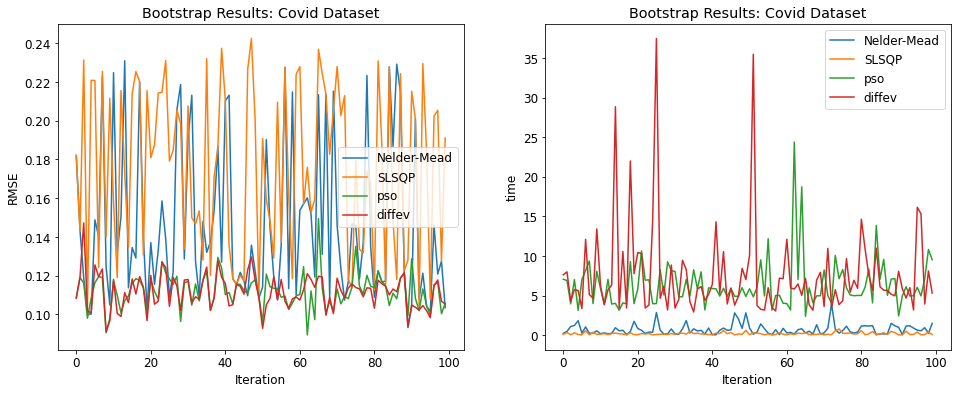

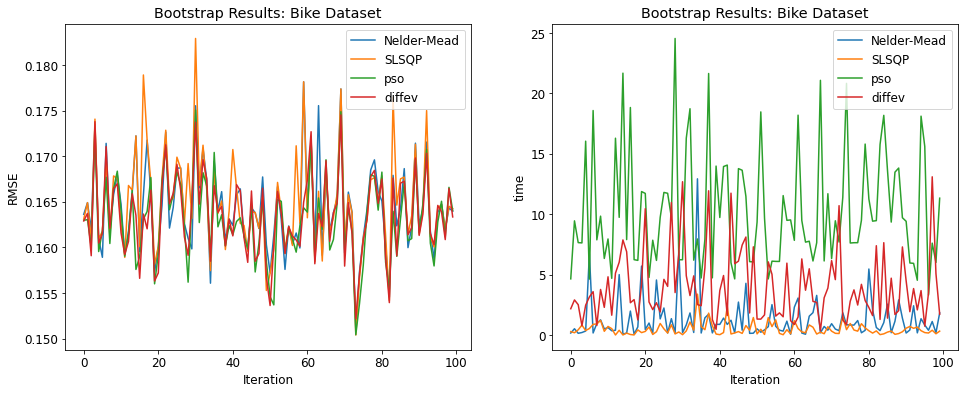

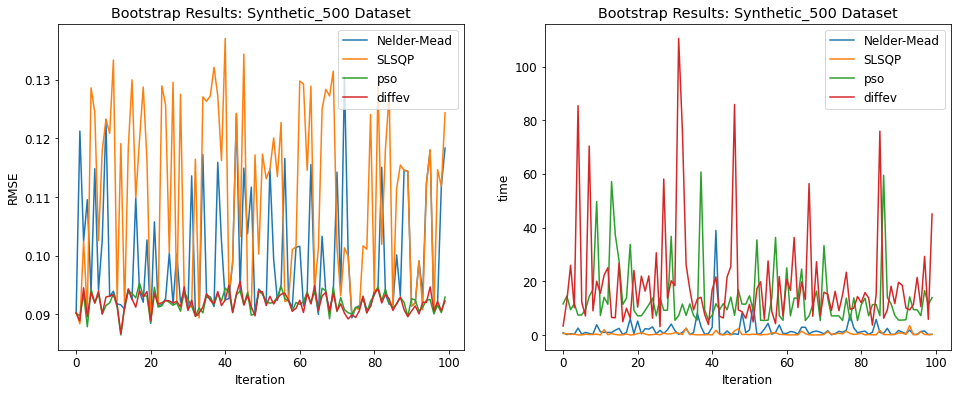

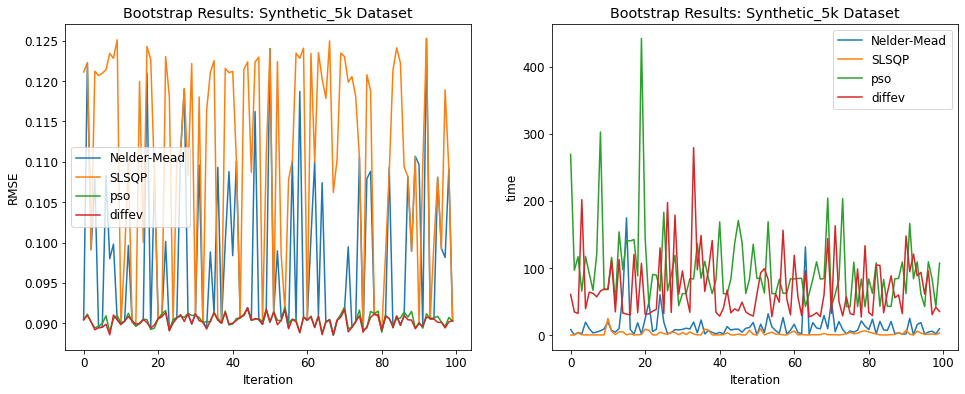

In [25]:
for dataset in datasets:
    df_all = pd.read_csv(f"../data/results/genetic_comp_{dataset['name']}_all.csv")
    df_best = pd.read_csv(f"../data/results/genetic_comp_{dataset['name']}_best.csv")

    idx = df_all.groupby(['iteration'])['test-rmse'].transform(min) == df_all['test-rmse']
    df_bestPerIter = df_all[idx]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    ax1.set_title(f"Bootstrap Results: {dataset['name']} Dataset")
    ax1.set_ylabel('RMSE')
    ax1.set_xlabel('Iteration')
    for method in df_all.method.unique():
        ax1.plot(df_all[df_all['method']==method]['iteration'], df_all[df_all['method']==method]['test-rmse'])
    ax1.legend(df_all.method.unique())
    # plt.savefig('../visualizations/genetic_bootstrap_covid')

    idx = df_all.groupby(['iteration'])['time'].transform(min) == df_all['time']
    df_bestPerIter = df_all[idx]

    # fig, ax = plt.subplots(figsize=(8,6))
    ax2.set_title(f"Bootstrap Results: {dataset['name']} Dataset")
    ax2.set_ylabel('time')
    ax2.set_xlabel('Iteration')
    for method in df_all.method.unique():
        ax2.plot(df_all[df_all['method']==method]['iteration'], df_all[df_all['method']==method]['time'])
    ax2.legend(df_all.method.unique())

    plt.show()

# Linear Regression Test

# Alphalooping and constrained optimization comparison

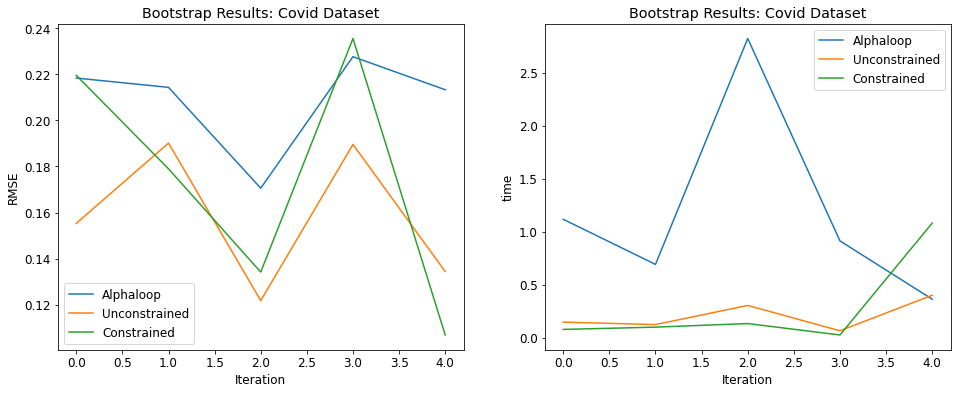

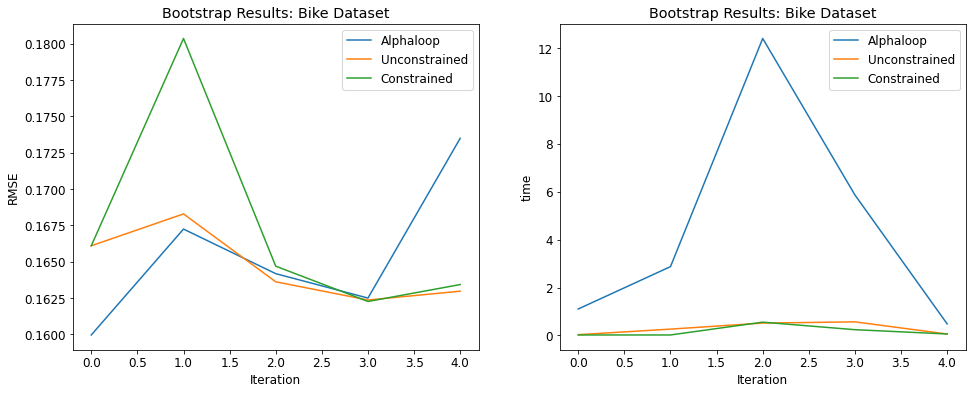

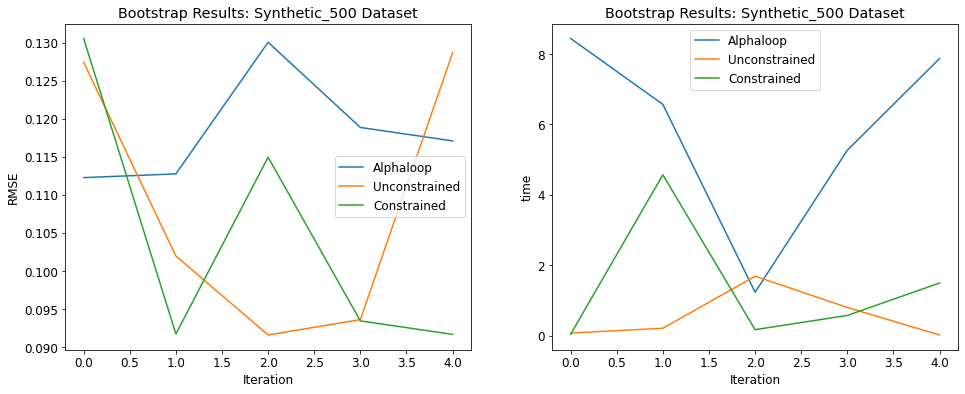

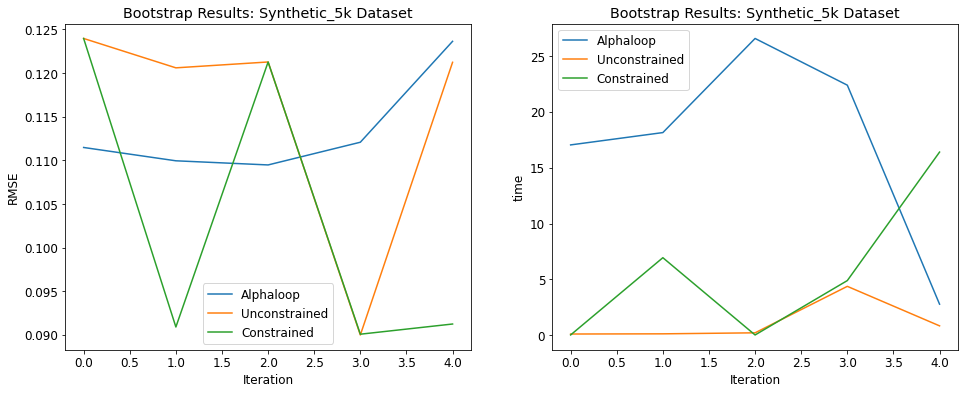

In [52]:
for dataset in datasets:
    df_all = pd.read_csv(f"../data/results/alphaloop_comp_{dataset['name']}_all.csv")
    df_best = pd.read_csv(f"../data/results/alphaloop_comp_{dataset['name']}_best.csv")

    
    idx = df_all.groupby(['iteration'])['test-rmse'].transform(min) == df_all['test-rmse']
    df_bestPerIter = df_all[idx]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    ax1.set_title(f"Bootstrap Results: {dataset['name']} Dataset")
    ax1.set_ylabel('RMSE')
    ax1.set_xlabel('Iteration')
    for method in df_all.method.unique():
        ax1.plot(df_all[df_all['method']==method]['iteration'], df_all[df_all['method']==method]['test-rmse'])
    ax1.legend(df_all.method.unique())
    # plt.savefig('../visualizations/genetic_bootstrap_covid')

    idx = df_all.groupby(['iteration'])['time'].transform(min) == df_all['time']
    df_bestPerIter = df_all[idx]

    # fig, ax = plt.subplots(figsize=(8,6))
    ax2.set_title(f"Bootstrap Results: {dataset['name']} Dataset")
    ax2.set_ylabel('time')
    ax2.set_xlabel('Iteration')
    for method in df_all.method.unique():
        ax2.plot(df_all[df_all['method']==method]['iteration'], df_all[df_all['method']==method]['time'])
    ax2.legend(df_all.method.unique())

In [48]:
for dataset in datasets:
    df_all = pd.read_csv(f"../data/results/alphaloop_comp_{dataset['name']}_all.csv")
    df_best = pd.read_csv(f"../data/results/alphaloop_comp_{dataset['name']}_best.csv")

    def badLoc(knotLoc):
        locs = knotLoc[1:-1].strip().split(' ')
        bad = 0
        for knot in locs:
            if knot == '':
                continue
            elif float(knot) < 0 or float(knot) > 1:
                bad += 1
        return bad

    def badLocError(knotLoc):
        locs = knotLoc[1:-1].strip().split(' ')
        error = 0
        for knot in locs:
            if knot == '':
                continue
            elif float(knot) < 0:
                error += float(knot)**2
            elif float(knot) > 1:
                error += (float(knot)-1)**2
        return error

    df_all['badKnots'] = df_all.knotLoc.apply(lambda x : badLoc(x))
    df_all['badKnotsError'] = df_all.knotLoc.apply(lambda x : badLocError(x))

    print(df_all[df_all['method'] == 'Unconstrained'][['badKnots', 'badKnotsError']].describe())
    print('\n')
    print(df_all[df_all['method'] == 'Alphaloop'][['badKnots', 'badKnotsError']].describe())
    print('\n')
    print(df_all[df_all['method'] == 'Constrained'][['badKnots', 'badKnotsError']].describe())
    print('\n')


       badKnots  badKnotsError
count  5.000000       5.000000
mean   0.600000     638.978763
std    0.547723    1419.416399
min    0.000000       0.000000
25%    0.000000       0.000000
50%    1.000000       1.191339
75%    1.000000      15.622003
max    1.000000    3178.080471


       badKnots  badKnotsError
count  5.000000       5.000000
mean   0.600000       2.524660
std    0.547723       4.945772
min    0.000000       0.000000
25%    0.000000       0.000000
50%    1.000000       0.000747
75%    1.000000       1.308888
max    1.000000      11.313663


       badKnots  badKnotsError
count       5.0            5.0
mean        0.0            0.0
std         0.0            0.0
min         0.0            0.0
25%         0.0            0.0
50%         0.0            0.0
75%         0.0            0.0
max         0.0            0.0


       badKnots  badKnotsError
count  5.000000       5.000000
mean   0.800000       8.640997
std    0.447214      18.125399
min    0.000000       0.000000
25

In [50]:
np.sqrt(np.sum(df_all['badKnotsError']) / 100)

2.505872050976058

In [51]:
    print(np.sqrt(np.sum(df_all[df_all['method'] == 'Unconstrained']['badKnotsError']) / 100))
    print('\n')
    print(np.sqrt(np.sum(df_all[df_all['method'] == 'Alphaloop']['badKnotsError']) / 100))
    print('\n')
    print(np.sqrt(np.sum(df_all[df_all['method'] == 'Constrained']['badKnotsError']) / 100))
    print('\n')

2.4967157063248524


0.21402200273278185


0.0


